## HyDe: a Software Package for Genome-Scale Hybridization Detection

HyDe is a piece of software that detects hybridization in phylogenomics data sets using site pattern probabilities under the coalescent model. The main way to use the software is through its Python interface, `phyde` (**P**ythonic **Hy**bridization **De**tection). The software also contains a C++ executable, `hyde_cpp`, that performs hypothesis tests for hybridization on all possible triples of taxa in a data set.

Documentation for downloading and installing HyDe can be found on [GitHub](https://github.com/pblischak/HyDe) with full docuentation hosted on [ReadTheDocs](http://hybridization-detection.rtfd.io).

Once HyDe is installed, we can begin to analyze data by importing the `phyde` module into a Python session:

```python
import phyde as hd
```

Each of the sections below walks through simulating and analyzing data sets using the main features of HyDe. First, we will import `phyde` and all of the other Python modules that we will need to perform our analyses.

In [11]:
from __future__ import print_function, division
import phyde as hd

# Import additional libraries for plotting, etc.
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns

In [12]:
%matplotlib inline

### Simulation 1: Hybrid Speciation

HyDe assues a model of hybrid speciation with two parental taxa contributing a proportion of their genome to the hybrid (parent 1: $\gamma$, parent 2: $1-\gamma$). The code below uses `ms` and `Seq-Gen` to simulate gene trees and sequence data that can be analyzed using HyDe.

The values of `GAMMA`, `THETA`, and `SITES` can be changed in the code for the simulation below to see how well HyDe can estimate the amount of hybridization. `GAMMA` controls how much of the hybrid is a mixture from parent 1. `THETA` scales the gene tree branch lenghts from `ms` into the number of expected mutations per site on each branch. `SITES` controls the number of sites that are simulated.

In [ ]:
%%bash

# Set the value of gamma, theta, and 
# the number of sites that you want
GAMMA=0.45
THETA=0.1
SITES=50000

# ms sims tree 1: (((p1,hyb),p2),out)
ms 16 $(echo "$SITES * $GAMMA" | bc) -T -I 4 5 5 5 1 \
    -ej 0.25 2 1 -ej 0.5 1 3 -ej 0.75 3 4 | grep '^(' > trees.tre

# ms sims tree 2: ((p1,(hyb,p2)),out)
ms 16 $(echo "$SITES * (1.0 - $GAMMA)" | bc) -T -I 4 5 5 5 1 \
    -ej 0.25 2 3 -ej 0.5 1 3 -ej 0.75 3 4 | grep '^(' >> trees.tre

#seq-gen sims using GTR+I+G
seq-gen -mGTR -s $THETA -l 1 -r 1.0 0.2 10.0 0.75 3.2 1.6 \
    -f 0.15 0.35 0.15 0.35 -i 0.2 -a 5.0 -g 3 -q < trees.tre > seqs.txt


# converting for HyDe..."
python seqgen2matrix.py seqs.txt data.txt map.txt

After simulating the data set (or using the one already provided), we will now read the data into Python using the `HydeData` class. Then we will run two hypothesis tests: one at the population level (`test_triple(...)`) and one at the individual level (`text_individuals(...)`).

In [4]:
# Read in the data
data = hd.HydeData("data.txt", "map.txt", "out", 16, 4, 50000)

# Run a hypothesis test on the sp2 population
res1 = data.test_triple('sp1', 'sp2', 'sp3')

# Run a hypothesis test on all individuals in the sp2 population
res2 = data.test_individuals('sp1', 'sp2', 'sp3')

Reading input file................Done.
Reading map file................Done.


In [3]:
# Check out result for test_triple()
res1

{'AAAA': 276715.0,
 'AAAB': 225120.0,
 'AABA': 123045.0,
 'AABB': 19495.0,
 'AABC': 281770.0,
 'ABAA': 74176.0,
 'ABAB': 18539.0,
 'ABAC': 115706.0,
 'ABBA': 494397.0,
 'ABBC': 20129.0,
 'ABCD': 0.0,
 'BAAA': 35557.0,
 'BACA': 38993.0,
 'BCAA': 2246.0,
 'CABC': 27837.0,
 'Gamma': 0.45940773681124786,
 'Pvalue': 2.220446049250313e-16,
 'Zscore': 8.179342426207114}

In [4]:
# Check out the result for test_individuals()
res2

{'i10': {'AAAA': 55423.0,
  'AAAB': 45192.0,
  'AABA': 24614.0,
  'AABB': 3814.0,
  'AABC': 55913.0,
  'ABAA': 15001.0,
  'ABAB': 3776.0,
  'ABAC': 23354.0,
  'ABBA': 98647.0,
  'ABBC': 4254.0,
  'ABCD': 0.0,
  'BAAA': 6974.0,
  'BACA': 7859.0,
  'BCAA': 458.0,
  'CABC': 5634.0,
  'Gamma': 0.46493376377602136,
  'Pvalue': 2.220446049250313e-16,
  'Zscore': 8.132716161034567},
 'i6': {'AAAA': 55957.0,
  'AAAB': 44296.0,
  'AABA': 24187.0,
  'AABB': 3707.0,
  'AABC': 56397.0,
  'ABAA': 14397.0,
  'ABAB': 3566.0,
  'ABAC': 22874.0,
  'ABBA': 99123.0,
  'ABBC': 4250.0,
  'ABCD': 0.0,
  'BAAA': 6963.0,
  'BACA': 8075.0,
  'BCAA': 463.0,
  'CABC': 5762.0,
  'Gamma': 0.4640608748015547,
  'Pvalue': 0.0,
  'Zscore': 8.345816737520295},
 'i7': {'AAAA': 55213.0,
  'AAAB': 45082.0,
  'AABA': 24831.0,
  'AABB': 3807.0,
  'AABC': 55853.0,
  'ABAA': 14564.0,
  'ABAB': 3698.0,
  'ABAC': 23474.0,
  'ABBA': 99249.0,
  'ABBC': 4194.0,
  'ABCD': 0.0,
  'BAAA': 7227.0,
  'BACA': 7695.0,
  'BCAA': 447.0,
 

Next we'll run a full HyDe analysis with the `hyde_cpp` program using the `run_hyde(...)` function. This will test all possible triples in all directions and will return the result to Python as an object of class `HydeResult`. We will also perform bootstrap resampling on individuals within taxa using the `bootReps` option.

In [5]:
res, boot = hd.run_hyde("data.txt", "map.txt", "out", 16, 4, 50000, bootReps=100)


**  Warning: File 'hyde-out.txt' already exists. **
**  Renaming to 'old-hyde-out.txt'. **


**  Warning: File 'hyde-boot.txt' already exists. **
**  Renaming to 'old-hyde-boot.txt'. **

Number of boot reps: 100


### Plotting

Plotting results with HyDe is done using the Matplotlib and Seaborn modules that we loaded earlier. The `phyde` module has some built in functions for plotting the distributions of the different values in our bootstrap samples. To use these functions, we provide our Bootstrap object (`boot`) as an argument, as well as the parameter we want to plot, and the triple of taxa that we want to plot. Additional arguments for axis labels and titles are provided, too.

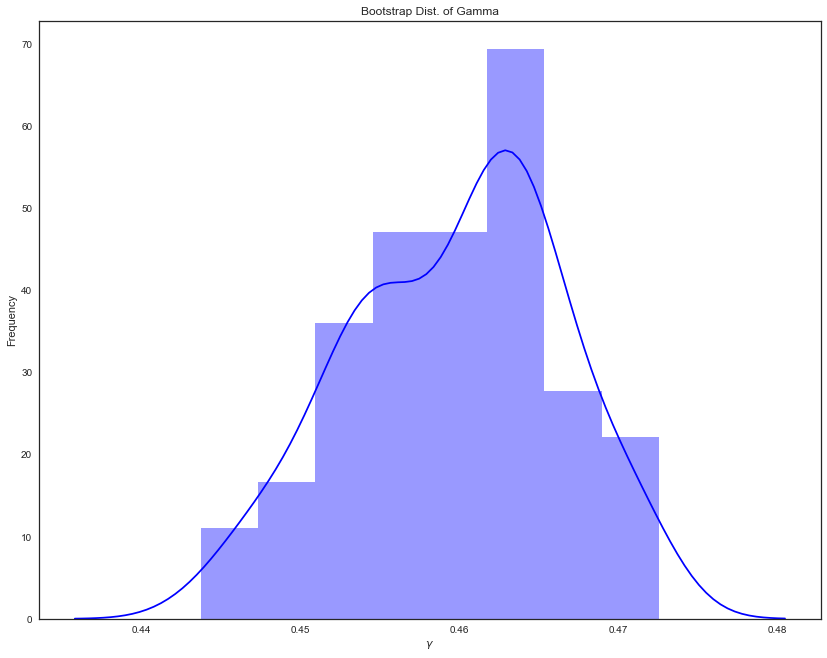

In [6]:
p = hd.viz.dist(boot, "Gamma", "sp1", "sp2", "sp3",
                title="Bootstrap Dist. of Gamma", xlab="$\gamma$", ylab="Frequency")

# Uncomment the line below to save as PDF
#p.figure.savefig("bootstrap-gamma.pdf")

We can also define generic plotting functions using the Seaborn module to plot arrays of data.

In [6]:
# Define a few generic plotting functions to make things easier
# down the road
def plot_dist(arr, title="", xlab="", ylab="", col='b'):
    plt.figure(figsize=(14, 11))
    sns.set_style("white")
    ax = sns.distplot(arr, color=col)
    ax.set(ylabel=ylab, xlabel=xlab)
    sns.plt.title(title)
    return ax

def plot_density(arr, title="", xlab="", ylab="", col='b'):
    plt.figure(figsize=(14, 11))
    sns.set_style("white")
    ax = sns.kdeplot(arr, shade=True, color=col)
    ax.set(ylabel=ylab, xlabel=xlab)
    sns.plt.title(title)
    return ax

### D-Statistic (ABBA_BABA)

Because we are calculating and storing site pattern probabilities as part of a HyDe analysis, we can also calculate Patterson's D-Stastistic using the output. The function below will calculate the D-Statistic for all boostrap replicates for a given triple. Objects of the `HydeResult` and `Bootstrap` classes have built-in methods for calculating the D-Statistic for a given triple.

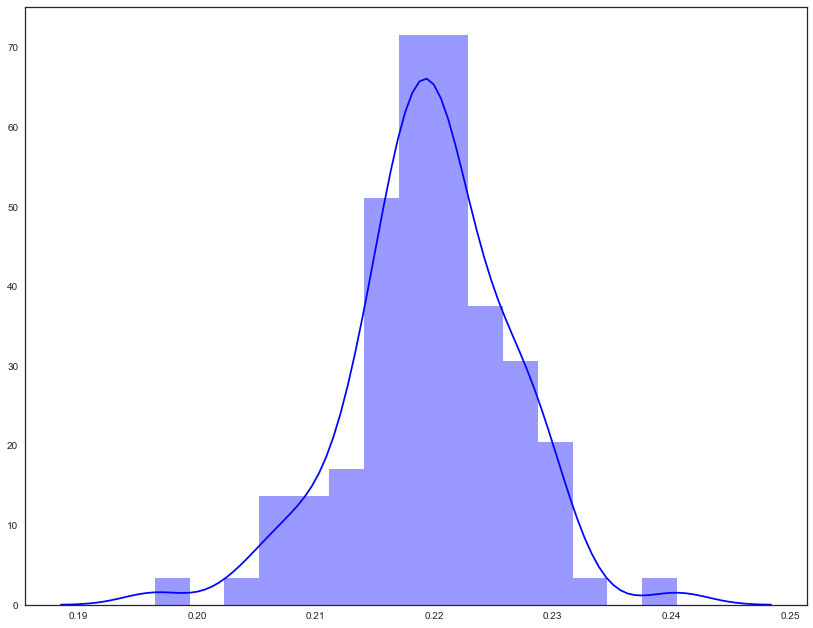

In [9]:
# abba_baba is a method of the bootstrap class
# plot using generic fxns we defines above
plot_dist(boot.abba_baba("sp1", "sp2", "sp3"))

### Simulation 2: F1 Hybrid Individual

Using a similar setup to the first set of simulations, we will now generate a data set where only one individual in the "hybrid" population is actually a hybrid (an F1 with $\gamma$=0.5).

In [27]:
%%bash

# Set the value of theta, and 
# the number of sites that you want
THETA=0.1
SITES=50000

# ms sims tree 1: (((p1,hyb),p2),out)
ms 16 $(echo "$SITES * 0.5" | bc) -T -I 5 5 4 1 5 1 -ej 0.25 3 1 -ej 0.25 2 1 \
    -ej 0.5 1 4 -ej 0.75 4 5 | grep '^(' > trees_f1.tre

# ms sims tree 2: ((p1,(hyb,p2)),out)
ms 16 $(echo "$SITES * 0.5" | bc) -T -I 5 5 4 1 5 1 -ej 0.25 3 4 -ej 0.25 2 1 \
    -ej 0.5 1 4 -ej 0.75 4 5 | grep '^(' >> trees_f1.tre

#seq-gen sims using GTR+I+G
seq-gen -mGTR -s $THETA -l 1 -r 1.0 0.2 10.0 0.75 3.2 1.6 \
    -f 0.15 0.35 0.15 0.35 -i 0.2 -a 5.0 -g 3 -q < trees_f1.tre > seqs_f1.txt


# converting for HyDe..."
python seqgen2matrix.py seqs_f1.txt data_f1.txt map_f1.txt

We will read in the data and run the hypothesis tests just like we did before:

In [12]:
# Read the data in
data_f1 = hd.HydeData("data_f1.txt", "map_f1.txt", "out", 16, 4, 50000)

# Run a hypothesis test on the sp2 population
res1_f1 = data_f1.test_triple('sp1', 'sp2', 'sp3')

# Run a hypothesis test on all individuals in the sp2 population
res2_f1 = data_f1.test_individuals('sp1', 'sp2', 'sp3')

Reading input file................Done.
Reading map file................Done.


In [13]:
res1_f1

{'AAAA': 319234.0,
 'AAAB': 227584.0,
 'AABA': 82633.0,
 'AABB': 19278.0,
 'AABC': 238609.0,
 'ABAA': 73468.0,
 'ABAB': 18343.0,
 'ABAC': 155968.0,
 'ABBA': 499293.0,
 'ABBC': 20643.0,
 'ABCD': 0.0,
 'BAAA': 45124.0,
 'BACA': 29919.0,
 'BCAA': 2194.0,
 'CABC': 27389.0,
 'Gamma': 0.9000163639338897,
 'Pvalue': 0.014976184383787783,
 'Zscore': 2.1707182783404586}

In [14]:
res2_f1

{'i10': {'AAAA': 56973.0,
  'AAAB': 47139.0,
  'AABA': 23484.0,
  'AABB': 3772.0,
  'AABC': 54943.0,
  'ABAA': 14398.0,
  'ABAB': 3694.0,
  'ABAC': 23772.0,
  'ABBA': 100264.0,
  'ABBC': 4329.0,
  'ABCD': 0.0,
  'BAAA': 7384.0,
  'BACA': 7702.0,
  'BCAA': 336.0,
  'CABC': 5368.0,
  'Gamma': 0.5078006500541712,
  'Pvalue': 0.0,
  'Zscore': 8.488306961136423},
 'i6': {'AAAA': 65511.0,
  'AAAB': 44772.0,
  'AABA': 14678.0,
  'AABB': 4040.0,
  'AABC': 46271.0,
  'ABAA': 14781.0,
  'ABAB': 3653.0,
  'ABAC': 32794.0,
  'ABBA': 99400.0,
  'ABBC': 3979.0,
  'ABCD': 0.0,
  'BAAA': 9531.0,
  'BACA': 5467.0,
  'BCAA': 465.0,
  'CABC': 5849.0,
  'Gamma': 1.005750977107761,
  'Pvalue': 0.5476297621827365,
  'Zscore': -0.11967505466351377},
 'i7': {'AAAA': 65295.0,
  'AAAB': 44711.0,
  'AABA': 15320.0,
  'AABB': 3614.0,
  'AABC': 45770.0,
  'ABAA': 14702.0,
  'ABAB': 3713.0,
  'ABAC': 33321.0,
  'ABBA': 100250.0,
  'ABBC': 3953.0,
  'ABCD': 0.0,
  'BAAA': 9249.0,
  'BACA': 5675.0,
  'BCAA': 479.0,
 

As you can see from the results above, the population level analysis detects (incorrectly) that 'sp2' is a hybrid. When we do individual level analyses, we can see that only individual 'i10' is detected to be a hybrid, which is the correct inference. The value of gamma is also correctly inferred for this individual since we simulated it as a 50-50 mix of 'sp1' and 'sp3'.

Next we'll run a full HyDe analysis and will perform some bootstrapping.

In [3]:
res_f1, boot_f1 = hd.run_hyde("data_f1.txt", "map_f1.txt", "out", 16, 4, 50000, bootReps=200)


**  Warning: File 'hyde-out.txt' already exists. **
**  Renaming to 'old-hyde-out.txt'. **


**  Warning: File 'hyde-boot.txt' already exists. **
**  Renaming to 'old-hyde-boot.txt'. **

Number of boot reps: 200


When we visualize the distribution of Gamma and the test statistic, we can see that the value moves around depending on how many times the hybrid individual is resampled. We call this "hybrid wobble", and it is a good visual test to see if hybridization is uniform within the population being tested.

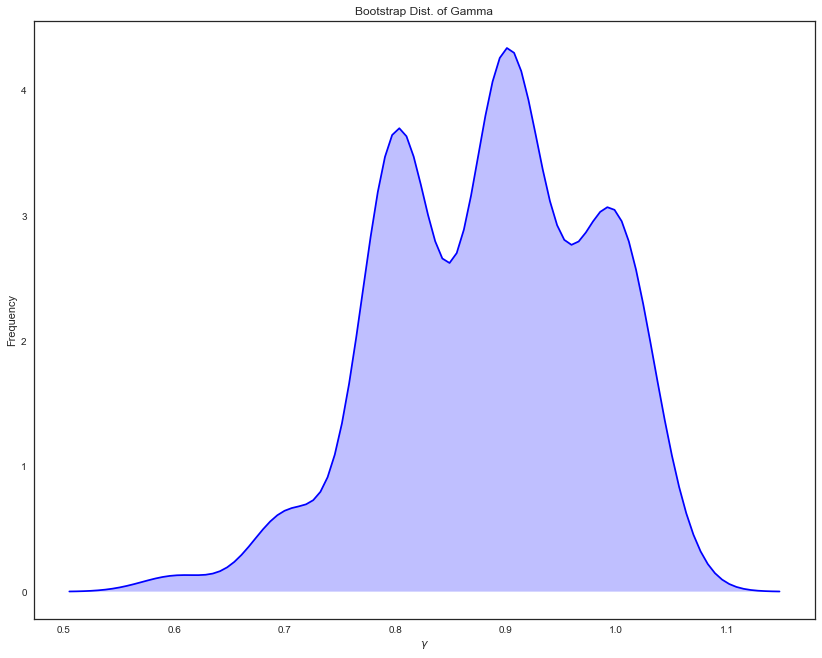

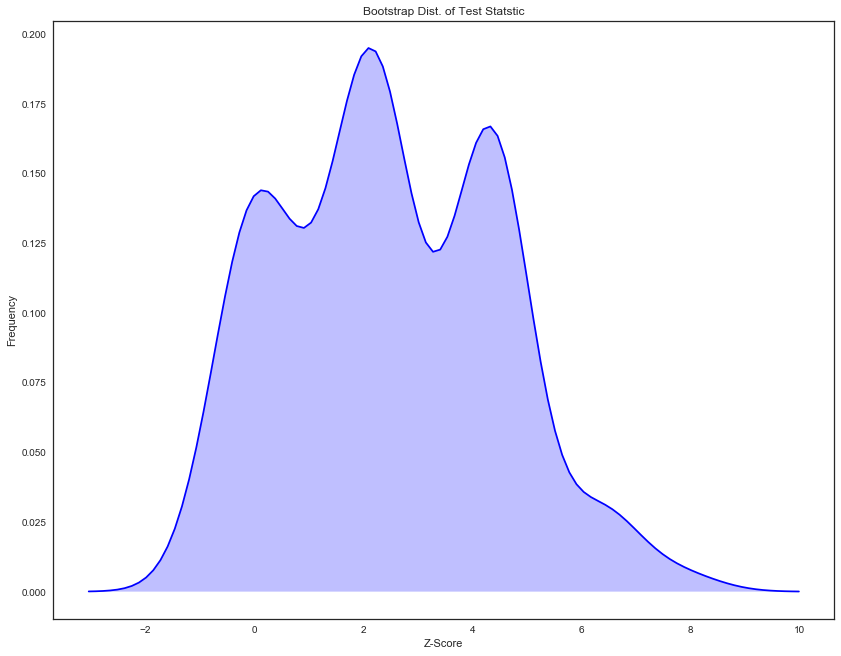

In [10]:
p1 = hd.viz.density(boot_f1, "Gamma", "sp1", "sp2", "sp3",
                    title="Bootstrap Dist. of Gamma", xlab="$\gamma$", ylab="Frequency")

p2 = hd.viz.density(boot_f1, "Zscore", "sp1", "sp2", "sp3",
                    title="Bootstrap Dist. of Test Statstic", xlab="Z-Score", ylab="Frequency")
# Uncomment the line below to save as PDF
#p1.figure.savefig("bootstrap-gamma-f1.pdf")
#p2.figure.savefig("bootstrap-zscore-f1.pdf")

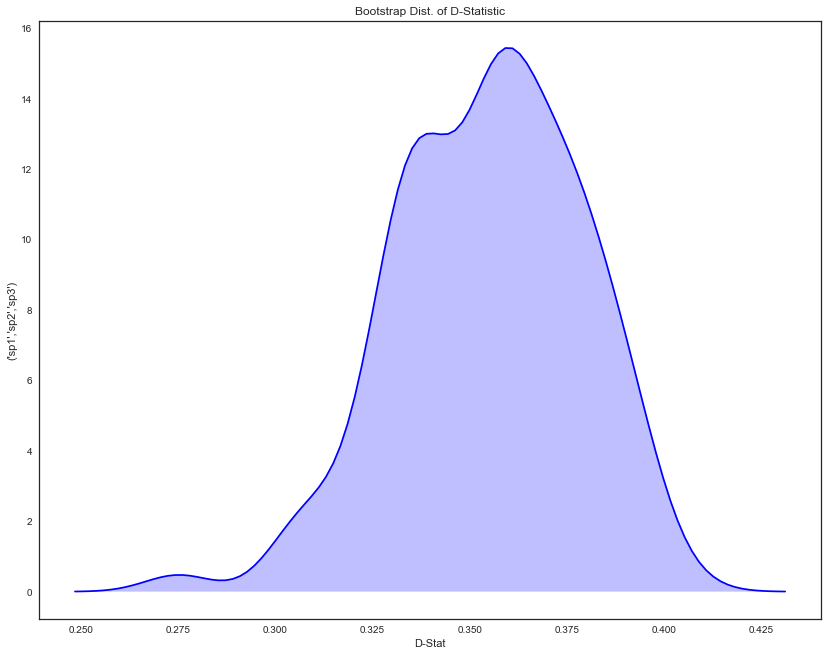

In [7]:
p = plot_density(boot_f1.abba_baba("sp1", "sp2", "sp3"), title="Bootstrap Dist. of D-Statistic",
                 xlab="D-Stat", ylab="('sp1','sp2','sp3')")

The wobble for the D-Statistic is not as noticable, but completing more bootstrap replicates can make the pattern more apparent.

### *Heliconius* Butterflies

We have provided the results files for analysis that we conducted on four taxa of *Heliconius* butterflies from Martin *et al*. (2013). The code below walks through reading in the results from `hyde_cpp` (using the `HydeResult` class) and the bootstrap replicates (using the `Bootstrap` class).

In [17]:
heli_res = hd.HydeResult("heliconius-out.txt")
print(heli_res.res)
heli_res.abba_baba("H.m.rosina", "H.cydno", "H.timareta")

{('H.m.rosina', 'H.cydno', 'H.timareta'): {'ABAB': 100925000.0, 'ABAC': 92674000.0, 'Zscore': 493.757, 'ABAA': 637213000.0, 'ABBC': 135649000.0, 'ABBA': 162814000.0, 'BACA': 95771600.0, 'AABA': 1003670000.0, 'AABB': 220124000.0, 'AABC': 266047000.0, 'ABCD': 6863250.0, 'BCAA': 129761000.0, 'AAAA': 8340360000.0, 'AAAB': 874840000.0, 'CABC': 150876000.0, 'BAAA': 902778000.0, 'Pvalue': 0.0, 'Gamma': 0.341761}}
0.234660023736


In [18]:
heli_boot = hd.Bootstrap("heliconius-boot.txt")

Number of boot reps: 20


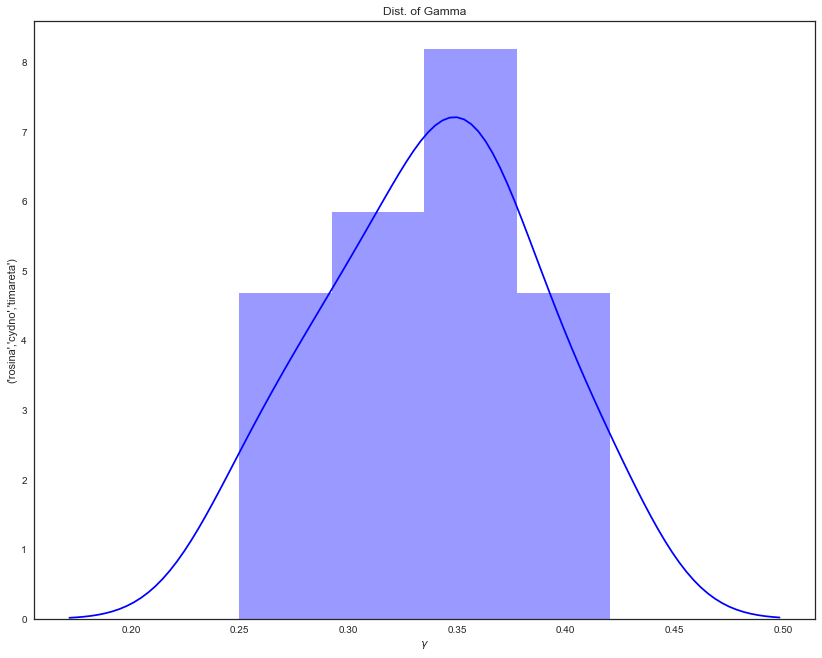

In [19]:
p = hd.viz.dist(heli_boot, "Gamma", "H.m.rosina", "H.cydno", "H.timareta", 
                title="Dist. of Gamma", xlab="$\gamma$", ylab="('rosina','cydno','timareta')")

# Uncomment the line below to save as PDF
#p.figure.savefig("heliconius-gamma.pdf")

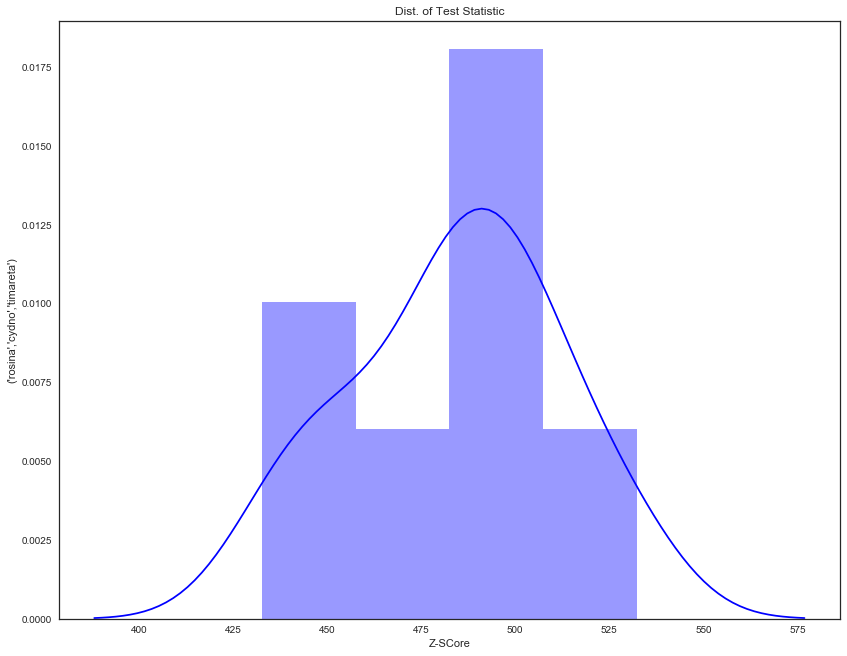

In [20]:
p = hd.viz.dist(heli_boot, "Zscore", "H.m.rosina", "H.cydno", "H.timareta", 
                title="Dist. of Test Statistic", xlab="Z-SCore", ylab="('rosina','cydno','timareta')")

# Uncomment the line below to save as PDF
#p.figure.savefig("heliconius-zscore.pdf")

### Swordtail fishes (genus *Xiphophorous*)

Our analysis of the swordtail data set from Cui et al. (2013) shows how HyDe can be used to analyze and process data for more than a single triple of taxa. The data set consists of 26 species and an outgroup. Below we read in these results using the `HydeResult` class and then we use dictionary comprehensions to filter the results based on whether or not the test is significant (p-value = $9.26 \times 10^{-6}$) and if it produced a reasonable estimate of gamma ($0 < \gamma < 1$).

In [22]:
res = hd.HydeResult("swordtail-out.txt")

# Filter the results based on P-values
fres1 = {k:v for k,v in res.res.items() if v["Pvalue"] < 9.62e-6}

# Filter the results based on P-values and Gamma
fres2 = {k:v for k,v in res.res.items() if v["Pvalue"] < 9.62e-6 and v["Gamma"] > 0.0 and v["Gamma"] < 1.0}
print(len(res.res), len(fres1), len(fres2))


4599 2910 2058


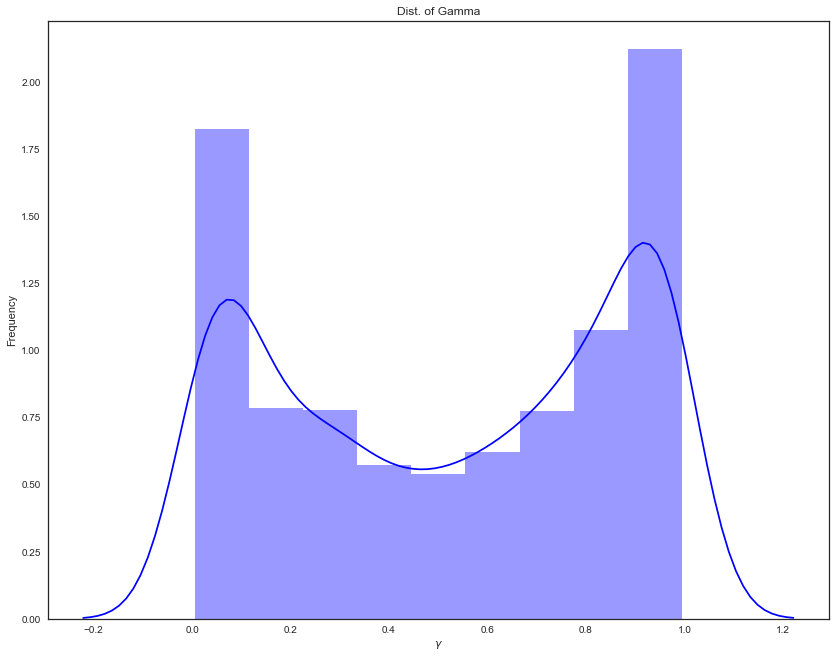

In [23]:
# Since we don't have a Bootstrap object we can just use our generic array plotting fxns
p = plot_dist(np.array([v["Gamma"] for v in fres2.values()]), 
              title="Dist. of Gamma", xlab="$\gamma$", ylab="Frequency")

# Uncomment the line below to save as PDF
#p.figure.savefig("swordtail-gamma.pdf")

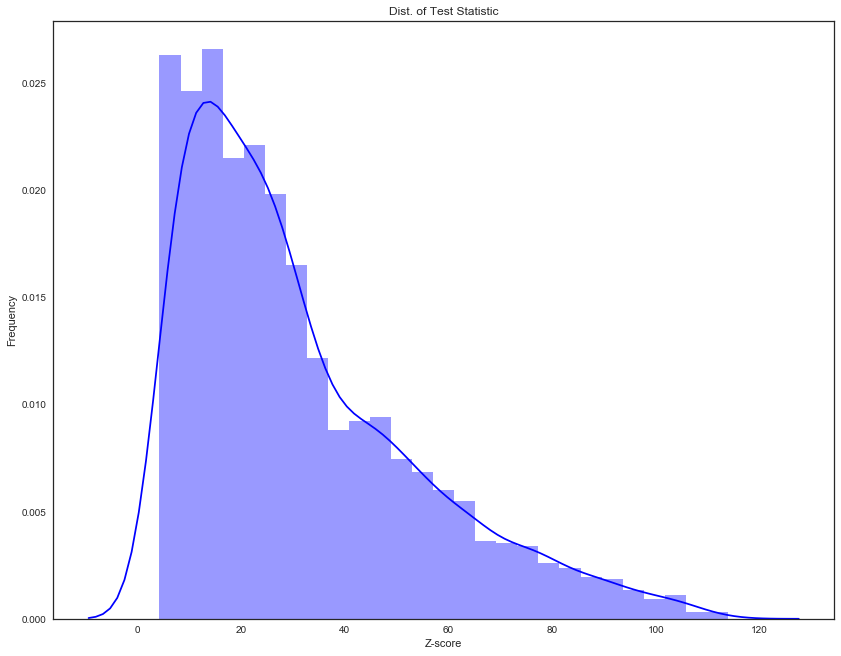

In [27]:
p = plot_dist(np.array([v["Zscore"] for v in fres1.values()]), 
              title="Dist. of Test Statistic", xlab="Z-score", ylab="Frequency")

# Uncomment the line below to save as PDF
#p.figure.savefig("swordtail-zscore.pdf")

#### References

- Cui *et al*. 2013. *Evolution*.
- Kubatko and Chifman. 2015. *bioRxiv*.
- Martin *et al*. 2013. *Genome Research*.